
**DEFINITION**

Industry 4.0 enhances efficiency, flexibility, and competitiveness in manufacturing by using technologies like IoT, AI, big data, and automation. As markets demand faster, more customized, and higher-quality production, smart factories help monitor and optimize operations in real time. This reduces downtime and costs through predictive maintenance, while enabling faster decisions and sustainable, agile production—making it essential for staying competitive

**PROBLEM MOTIVATION**

Predictive maintenance is crucial in asset-heavy industries where equipment failure can cause major losses. It relies on thousands of IoT sensors generating high-speed, real-time data, which is analyzed by AI models to predict failures in advance. Predictive maintenance is now required across varied industry making this a scalable Big Data storage and Processing problem statement.

•	Automotive Industry: Real-time monitoring of robots, motors, conveyors, assembly lines

•	Electronics & Semiconductors: Monitor cleanroom equipment, chip manufacturing machines

•	Pharmaceuticals & Healthcare: Monitoring production lines, HVAC systems, and sterilization equipment

•	FMCG & Food Processing: Monitor mixers, packaging lines, and refrigeration units.

•	Energy & Utilities: Monitor turbines, transformers, pipelines, and compressors

**Steps involved in Predictive Maintenance**

*   Data : Sensors monitor machine temperature, vibration, oil levels, etc.
*   Training : Models analyze patterns to predict failures before they happen.
*   Prediction : Data is streamed in real-time to a processing system. Model run on real time data to prediction healthy life time of machine
*   DashBoard : Alerts are generated to higlight machines with low life time for schedule maintenance, avoiding costly downtime.












In [ ]:
#######################################
###!@0.1 START INIT ENVIRONMENT
#import os
#os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
#os.environ["PATH"] = os.environ["JAVA_HOME"] + "/bin:" + os.environ["PATH"]
#!apt-get install -y openjdk-8-jdk-headless -qq > /dev/null
#!pip install pyspark
###!@0.1 END INIT ENVIRONMENT

In [1]:
!pip install pyspark

In [ ]:
#!apt-get install openjdk-8-jdk -y


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  at-spi2-core fonts-dejavu-core fonts-dejavu-extra gsettings-desktop-schemas
  libatk-bridge2.0-0 libatk-wrapper-java libatk-wrapper-java-jni libatk1.0-0
  libatk1.0-data libatspi2.0-0 libgail-common libgail18 libgtk2.0-0
  libgtk2.0-bin libgtk2.0-common librsvg2-common libxcomposite1 libxt-dev
  libxtst6 libxxf86dga1 openjdk-8-jdk-headless openjdk-8-jre
  openjdk-8-jre-headless session-migration x11-utils
Suggested packages:
  gvfs libxt-doc openjdk-8-demo openjdk-8-source visualvm libnss-mdns
  fonts-nanum fonts-ipafont-gothic fonts-ipafont-mincho fonts-wqy-microhei
  fonts-wqy-zenhei fonts-indic mesa-utils
The following NEW packages will be installed:
  at-spi2-core fonts-dejavu-core fonts-dejavu-extra gsettings-desktop-schemas
  libatk-bridge2.0-0 libatk-wrapper-java libatk-wrapper-java-jni libatk1.0-0
  libatk1.0-data libatspi2.0-0 

In [ ]:
#!apt-get update
#!apt-get install -y openjdk-11-jdk

Hit:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:2 https://cli.github.com/packages stable InRelease
Hit:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:4 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Hit:5 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:6 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:7 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Hit:8 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:9 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:10 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:11 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Reading package lists... Done
W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Reading packag

In [3]:
#######################################
###!@0.2 START OF PYSPARK INIT


from pyspark.sql import SparkSession
#from pyspark.sql import functions as F

spark = SparkSession.builder.appName("DES_project_predictive_maintenance") \
  .config("spark.executor.memory", "10g") \
  .config("spark.driver.memory", "10g") \
  .config("spark.memory.offHeap.size", "10g") \
  .getOrCreate()

  # Spark is ready to go within Colab!
###!@0.2 END OF PYSPARK INIT

In [ ]:
!java -version

openjdk version "17.0.16" 2025-07-15
OpenJDK Runtime Environment (build 17.0.16+8-Ubuntu-0ubuntu122.04.1)
OpenJDK 64-Bit Server VM (build 17.0.16+8-Ubuntu-0ubuntu122.04.1, mixed mode, sharing)


In [4]:
#######################################
###!@0.5 START COMMON USER IMPORTS
#######################################

##### Spark Dataframe Functions
from pyspark.sql.window import Window
from pyspark.sql.functions import monotonically_increasing_id, col, concat, lit
from pyspark.sql.types import DoubleType
from pyspark.sql.functions import when, sum, count
import pyspark.sql.functions as F
##### Plotting Libraries
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
#######################################
###!@0.3 READING DATAPATH

from google.colab import drive
drive.mount('/content/drive')

### Load necessary files and folders
data_path="/content/drive/MyDrive/Project_Sem1_DSS_Predictive_Maintenance/rul_hrs.csv"

# Verify the path by listing the directory content
!ls "/content/drive/MyDrive/Project_Sem1_DSS_Predictive_Maintenance/"


Mounted at /content/drive
model_class  predictive_maintenance_dataset.csv
model_reg    predictive_maintenance_dataset_old.csv
output	     Project_Sem1_DSS_Predictive_maintenance.ipynb
parquet      rul_hrs.csv


In [6]:
#######################################
###!@0.4 START OF INITIALIZE DATAFRAMES


input_df = spark.read.csv(data_path, header=True)
input_df.show()

print(input_df.count())
print(input_df.printSchema())

datapath_parquet="/content/drive/MyDrive/Project_Sem1_DSS_Predictive_Maintenance/parquet/"
input_df.write.mode("overwrite").parquet(datapath_parquet)
input_df = spark.read.parquet(datapath_parquet)

+---+-------------------+---------+---------+------------------+------------------+---------+-----------------+------------------+------------------+------------------+------------------+------------------+---------+------------------+------------------+---------+---------+---------+---------+-----------------+---------+---------+---------+---------+---------+---------+---------+---------+-----------------+---------+-----------------+---------+---------+---------+---------+---------+---------+-----------------+---------+---------+---------+------------------+------------------+---------+----------------+------------------+------------------+----------------+---------+-----------------+---------+------------------+
|_c0|          timestamp|sensor_00|sensor_01|         sensor_02|         sensor_03|sensor_04|        sensor_05|         sensor_06|         sensor_07|         sensor_08|         sensor_09|         sensor_10|sensor_11|         sensor_12|         sensor_13|sensor_14|sensor_16|se

In [7]:
#######################################
###!@0.6 Modify the Data to for project requirement
#######################################

###### Add Row Numbers

w = Window.orderBy("timestamp")
input_df = input_df.withColumn("row_num", F.row_number().over(w))
#input_df = input_df.withColumn("row_num", monotonically_increasing_id())

###### Aim : To find row where rul(current_row)>rul(prev_row)

###### Create Skewed rul column by 1
prev_df = input_df.select(
    col("row_num").alias("row_num_prev"),
    col("rul").alias("prev_rul")
)

input_df = input_df.join(
    prev_df,
    input_df.row_num == prev_df.row_num_prev + 1,
    how="left"
)
print(input_df.count())
###### Comparing rul, prev_rul and detecting where rul increases
input_df = input_df.withColumn(
    "increase_flag",
    when((col("rul") - col("prev_rul"))>1, 1).otherwise(0)
)

###### Count instances where increase_flag=1
input_df.agg(sum("increase_flag").alias("flag_count")).show()

###### Add a column of cumalative sum of increase_flag
input_df = input_df.withColumn("machine_group", F.sum("increase_flag").over(w) + 1)

###### Concatenate M+cumalative sum of increase_flag to get machine ID
input_df = input_df.withColumn("machine_id", F.concat(F.lit("M"), F.col("machine_group").cast("string")))


###### Display row numbers where new machine ID starts
input_df.filter(col("increase_flag") == 1).select("row_num", "rul", "prev_rul","machine_group", "machine_id").show()

input_df.show()

##### Drop row_num column - not needed
input_df = input_df.drop("row_num", "prev_rul", "increase_flag", "machine_group", "row_num_prev")

166441
+----------+
|flag_count|
+----------+
|         6|
+----------+

+-------+------------------+--------+-------------+----------+
|row_num|               rul|prev_rul|machine_group|machine_id|
+-------+------------------+--------+-------------+----------+
|  17157|122.56666666666666|     0.0|            2|        M2|
|  24512| 746.7833333333333|     0.0|            3|        M3|
|  69320|141.18333333333334|     0.0|            4|        M4|
|  77792| 837.4833333333333|     0.0|            5|        M5|
| 128042|218.16666666666666|     0.0|            6|        M6|
| 141133|             421.8|     0.0|            7|        M7|
+-------+------------------+--------+-------------+----------+

+---+-------------------+---------+---------+------------------+------------------+---------+-----------------+------------------+------------------+------------------+------------------+------------------+---------+------------------+------------------+---------+---------+---------+---------+--

In [8]:
#######################################
###!@0.8 Rename rul column, Add column for machine with healthy hr remaining < 24 hrs
#######################################
input_df = input_df.withColumnRenamed("rul", "hours_remaining_healthy")
input_df = input_df.withColumn(
    "machine_failure_in_24hrs",
    F.when(F.col("hours_remaining_healthy") < 24, 1).otherwise(0)
)



In [13]:
#######################################
###!@0.8 Data Clean up
#######################################

# List of columns to convert (all except '_c0' and 'timestamp')
cols_to_convert = [c for c in input_df.columns if c not in ['_c0', 'timestamp', 'machine_id']]

# Loop through and cast each column to DoubleType
for col_name in cols_to_convert:
    input_df = input_df.withColumn(col_name, F.col(col_name).cast(DoubleType()))
    input_df = input_df.withColumn(col_name, F.round(input_df[col_name], 3))
input_df.printSchema()

root
 |-- _c0: string (nullable = true)
 |-- timestamp: string (nullable = true)
 |-- sensor_00: double (nullable = true)
 |-- sensor_01: double (nullable = true)
 |-- sensor_02: double (nullable = true)
 |-- sensor_03: double (nullable = true)
 |-- sensor_04: double (nullable = true)
 |-- sensor_05: double (nullable = true)
 |-- sensor_06: double (nullable = true)
 |-- sensor_07: double (nullable = true)
 |-- sensor_08: double (nullable = true)
 |-- sensor_09: double (nullable = true)
 |-- sensor_10: double (nullable = true)
 |-- sensor_11: double (nullable = true)
 |-- sensor_12: double (nullable = true)
 |-- sensor_13: double (nullable = true)
 |-- sensor_14: double (nullable = true)
 |-- sensor_16: double (nullable = true)
 |-- sensor_17: double (nullable = true)
 |-- sensor_18: double (nullable = true)
 |-- sensor_19: double (nullable = true)
 |-- sensor_20: double (nullable = true)
 |-- sensor_21: double (nullable = true)
 |-- sensor_22: double (nullable = true)
 |-- sensor_23: d

In [12]:
sensor_cols = [c for c in input_df.columns if c not in ['_c0', 'timestamp', 'machine_id', 'hours_remaining_healthy', 'machine_failure_in_24hrs']]
print(sensor_cols)
for i, col in enumerate(sensor_cols):
    input_df_renamed = input_df.withColumnRenamed(col, f"sensor_{i+1}")

['sensor_00', 'sensor_01', 'sensor_02', 'sensor_03', 'sensor_04', 'sensor_05', 'sensor_06', 'sensor_07', 'sensor_08', 'sensor_09', 'sensor_10', 'sensor_11', 'sensor_12', 'sensor_13', 'sensor_14', 'sensor_16', 'sensor_17', 'sensor_18', 'sensor_19', 'sensor_20', 'sensor_21', 'sensor_22', 'sensor_23', 'sensor_24', 'sensor_25', 'sensor_26', 'sensor_27', 'sensor_28', 'sensor_29', 'sensor_30', 'sensor_31', 'sensor_32', 'sensor_33', 'sensor_34', 'sensor_35', 'sensor_36', 'sensor_37', 'sensor_38', 'sensor_39', 'sensor_40', 'sensor_41', 'sensor_42', 'sensor_43', 'sensor_44', 'sensor_45', 'sensor_46', 'sensor_47', 'sensor_48', 'sensor_49', 'sensor_51']


In [23]:
from pyspark.sql.functions import skewness
sensor_cols = [c for c in input_df_renamed.columns if c not in ['_c0', 'timestamp', 'machine_id', 'hours_remaining_healthy', 'machine_failure_in_24hrs']]
print(f"Skew for Sensor Data")
log_col = []
for col_name in sensor_cols:
    skew = input_df_renamed.select(skewness(col_name)).first()[0]
    print(col_name, skew)
    if skew > 1:
        log_col.append(col_name)
print(log_col)

Skew for Sensor Data
sensor_00 -4.458147860919828
sensor_01 -1.643282612915992
sensor_02 -2.4255829305183974
sensor_03 -1.6574520831990265
sensor_04 -2.864881159692863
sensor_05 -2.688224283014219
sensor_06 -4.563847493331725
sensor_07 -5.443387405629763
sensor_08 -5.383790846538977
sensor_09 -5.244426139479209
sensor_10 -2.1586693366647225
sensor_11 -1.8816033905049663
sensor_12 -1.6554872175371902
sensor_13 1.5559554845950614
sensor_14 -1.98177757710991
sensor_16 -2.073890300823643
sensor_17 -2.246803439116864
sensor_18 -1.8085622950001694
sensor_19 -2.001931483197189
sensor_20 -1.9785410607666045
sensor_21 -1.976884502340096
sensor_22 -1.9221987681612533
sensor_23 -1.8788150932699719
sensor_24 -1.9126645539763991
sensor_25 -1.9133952655508015
sensor_26 -1.710335953623792
sensor_27 2.2421796627779065
sensor_28 -1.4579424774832976
sensor_29 -0.9041427016274389
sensor_30 -1.1011712350554812
sensor_31 -0.7209028901644163
sensor_32 -0.9906521001592035
sensor_33 -1.2461308157351079
sensor

In [ ]:
input_df_renamed.show()

+---+-------------------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+-----------------------+----------+------------------------+
|_c0|          timestamp|sensor_00|sensor_01|sensor_02|sensor_03|sensor_04|sensor_05|sensor_06|sensor_07|sensor_08|sensor_09|sensor_10|sensor_11|sensor_12|sensor_13|sensor_14|sensor_16|sensor_17|sensor_18|sensor_19|sensor_20|sensor_21|sensor_22|sensor_23|sensor_24|sensor_25|sensor_26|sensor_27|sensor_28|sensor_29|sensor_30|sensor_31|sensor_32|sensor_33|sensor_34|sensor_35|sensor_36|sensor_37|sensor_38|sensor_39

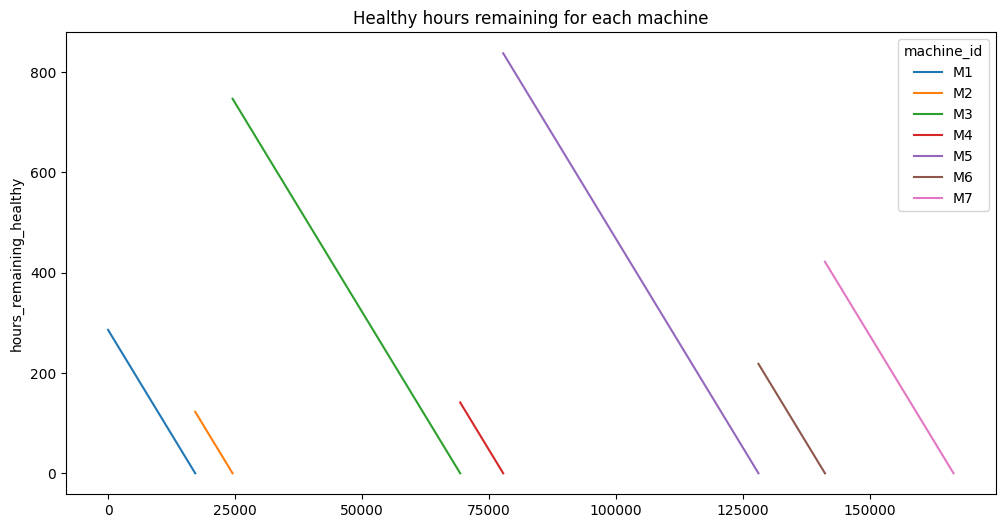

In [ ]:
#######################################
###!@0.7 Visualize Data to be used for Training
#######################################
from matplotlib.ticker import MaxNLocator
# Convert Machine_id, rul to Pandas Dataframe
pandas_df = input_df_renamed.select("machine_id", "hours_remaining_healthy").toPandas()
pandas_df['hours_remaining_healthy'] = pandas_df['hours_remaining_healthy'].round(2)
#pandas_df_sample = pandas_df.iloc[:10000]
plt.figure(figsize=(12,6))
sns.lineplot(x=range(len(pandas_df)), y="hours_remaining_healthy", hue="machine_id", data=pandas_df)
plt.title("Healthy hours remaining for each machine")
plt.locator_params(axis='y', nbins=6)
plt.show()

#pandas_df_sample = pandas_df.iloc[17157:(17157+10000)]
#plt.figure(figsize=(5,5))
#sns.lineplot(x=range(len(pandas_df_sample)), y="hours_remaining_healthy", hue="machine_id", data=pandas_df_sample)
#plt.title("Healthy hours remaining for each machine")
#plt.locator_params(axis='y', nbins=6)
#plt.show()

In [ ]:
data_path_out="/content/drive/MyDrive/Project_Sem1_DSS_Predictive_Maintenance/output/"

input_df_renamed.coalesce(1).write \
    .option("header", "true") \
    .csv(data_path_out)

In [ ]:
##### Prepare data for training, Prediction
input_df_clean = input_df_renamed.drop('_c0', 'timestamp', 'machine_id')
input_df_clean = input_df_clean.na.drop()
input_df_clean.cache() # Cache the DataFrame to prevent re-reading the source file

DataFrame[sensor_00: double, sensor_01: double, sensor_02: double, sensor_03: double, sensor_04: double, sensor_05: double, sensor_06: double, sensor_07: double, sensor_08: double, sensor_09: double, sensor_10: double, sensor_11: double, sensor_12: double, sensor_13: double, sensor_14: double, sensor_16: double, sensor_17: double, sensor_18: double, sensor_19: double, sensor_20: double, sensor_21: double, sensor_22: double, sensor_23: double, sensor_24: double, sensor_25: double, sensor_26: double, sensor_27: double, sensor_28: double, sensor_29: double, sensor_30: double, sensor_31: double, sensor_32: double, sensor_33: double, sensor_34: double, sensor_35: double, sensor_36: double, sensor_37: double, sensor_38: double, sensor_39: double, sensor_40: double, sensor_41: double, sensor_42: double, sensor_43: double, sensor_44: double, sensor_45: double, sensor_46: double, sensor_47: double, sensor_48: double, sensor_49: double, sensor_50: double, hours_remaining_healthy: double, machine

In [ ]:
input_df_clean.printSchema()

root
 |-- sensor_00: double (nullable = true)
 |-- sensor_01: double (nullable = true)
 |-- sensor_02: double (nullable = true)
 |-- sensor_03: double (nullable = true)
 |-- sensor_04: double (nullable = true)
 |-- sensor_05: double (nullable = true)
 |-- sensor_06: double (nullable = true)
 |-- sensor_07: double (nullable = true)
 |-- sensor_08: double (nullable = true)
 |-- sensor_09: double (nullable = true)
 |-- sensor_10: double (nullable = true)
 |-- sensor_11: double (nullable = true)
 |-- sensor_12: double (nullable = true)
 |-- sensor_13: double (nullable = true)
 |-- sensor_14: double (nullable = true)
 |-- sensor_16: double (nullable = true)
 |-- sensor_17: double (nullable = true)
 |-- sensor_18: double (nullable = true)
 |-- sensor_19: double (nullable = true)
 |-- sensor_20: double (nullable = true)
 |-- sensor_21: double (nullable = true)
 |-- sensor_22: double (nullable = true)
 |-- sensor_23: double (nullable = true)
 |-- sensor_24: double (nullable = true)
 |-- sensor

In [ ]:
from pyspark.ml import Pipeline
from pyspark.ml.feature import StringIndexer, OneHotEncoder, VectorAssembler,StandardScaler
from pyspark.ml.regression import LinearRegression

In [ ]:
#######################################
###!@0.8 Training and test data split
#######################################

#input_df_clean1 = input_df_clean.repartition(4)
#input_df_clean1.cache()
#
input_df_clean1 = input_df_clean.repartition(4)
input_df_clean1.cache()
train_100k = input_df_clean1.limit(100000)
#train_df, test_df = input_df_clean1.randomSplit(weights=[0.8, 0.2], seed=74)
train_df, test_df = train_100k.randomSplit(weights=[0.8, 0.2], seed=74)
print(f"Training Rows: {train_df.count()}")
print(f"Testing Rows: {test_df.count()}")

Training Rows: 79734
Testing Rows: 20266


In [ ]:
#### Exclude label columns and categorical columns from numerical features
excluded_cols = ['hours_remaining_healthy', 'machine_failure_in_24hrs']
num_cols = [col_name for col_name in input_df_clean.columns if col_name not in excluded_cols]

In [ ]:
for c in num_cols:
    corr_value = input_df_clean.stat.corr("hours_remaining_healthy", c)
    print(f"{c}  →  correlation = {corr_value}")

sensor_00  →  correlation = 0.05912114471592276
sensor_01  →  correlation = 0.10540636463422501
sensor_02  →  correlation = 0.12300591002615685
sensor_03  →  correlation = 0.04041734522601546
sensor_04  →  correlation = 0.01573231841868516
sensor_05  →  correlation = -0.13682952984536964
sensor_06  →  correlation = -0.1223092882115208
sensor_07  →  correlation = -0.11858716896761821
sensor_08  →  correlation = -0.06647880648566623
sensor_09  →  correlation = -0.13483941648913783
sensor_10  →  correlation = 0.04008874762219254
sensor_11  →  correlation = -0.12257091315839416
sensor_12  →  correlation = -0.015098263031566205
sensor_13  →  correlation = -0.27694254394872486
sensor_14  →  correlation = 0.09776902426077916
sensor_16  →  correlation = 0.09473561596304655
sensor_17  →  correlation = 0.11385662864394683
sensor_18  →  correlation = 0.11758259600171464
sensor_19  →  correlation = 0.09682180559531385
sensor_20  →  correlation = 0.09520047730795352
sensor_21  →  correlation = 0.09

In [ ]:


### Generate vector for each row
assembler = VectorAssembler(
    inputCols= num_cols ,
    outputCol="features_vector",
)


input_vec_df = assembler.transform(input_df_clean)

input_vec_df.show()




+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+-----------------------+------------------------+--------------------+
|sensor_00|sensor_01|sensor_02|sensor_03|sensor_04|sensor_05|sensor_06|sensor_07|sensor_08|sensor_09|sensor_10|sensor_11|sensor_12|sensor_13|sensor_14|sensor_16|sensor_17|sensor_18|sensor_19|sensor_20|sensor_21|sensor_22|sensor_23|sensor_24|sensor_25|sensor_26|sensor_27|sensor_28|sensor_29|sensor_30|sensor_31|sensor_32|sensor_33|sensor_34|sensor_35|sensor_36|sensor_37|sensor_38|sensor_39|sensor_40|sensor_41|sensor_42|sensor_

In [ ]:
# 2. Define the Scaler
# withStd=True means it scales to unit standard deviation.
# withMean=False means it does not center (no mean subtraction)
scaler = StandardScaler(
    inputCol="features_vector",
    outputCol="scaled_features_vector",
    withStd=True,
    withMean=False
)

scaled_input_vec_df = scaler.fit(input_vec_df).transform(input_vec_df)
input_vec_df.select("features_vector").show()
scaled_input_vec_df.select("features_vector", "scaled_features_vector").show()

+--------------------+
|     features_vector|
+--------------------+
|[2.465,47.092,53....|
|[2.465,47.092,53....|
|[2.445,47.352,53....|
|[2.46,47.092,53.1...|
|[2.446,47.135,53....|
|[2.454,47.092,53....|
|[2.456,47.049,53....|
|[2.45,47.135,53.1...|
|[2.463,47.092,53....|
|[2.446,47.179,53....|
|[2.464,47.483,53....|
|[2.445,47.917,53....|
|[2.46,48.264,53.1...|
|[2.449,48.438,53....|
|[2.454,48.568,53....|
|[2.456,48.394,53....|
|[2.45,48.394,53.1...|
|[2.463,48.481,53....|
|[2.446,48.611,53....|
|[2.464,48.611,53....|
+--------------------+
only showing top 20 rows

+--------------------+----------------------+
|     features_vector|scaled_features_vector|
+--------------------+----------------------+
|[2.465,47.092,53....|  [5.51282989301797...|
|[2.465,47.092,53....|  [5.51282989301797...|
|[2.445,47.352,53....|  [5.46810105007259...|
|[2.46,47.092,53.1...|  [5.50164768228162...|
|[2.446,47.135,53....|  [5.47033749221986...|
|[2.454,47.092,53....|  [5.48822902939801...|
|[2.456,

In [ ]:
lrEstimator = LinearRegression(
    featuresCol="scaled_features_vector",
    labelCol="hours_remaining_healthy",
    predictionCol="predicted_hours_remaining_healthy",
)

lrModelTransformer = lrEstimator.fit(scaled_input_vec_df)

print("Coefficients:", lrModelTransformer.coefficients)
print("Intercept:", lrModelTransformer.intercept)

Coefficients: [29.03507295920519,-16.10437524386116,25.828908568134697,30.968813539198603,-30.461007101976556,-11.106425202521265,-0.15523052697672388,5.709750169181929,16.238012782949422,-41.583391484522785,67.42004369590265,-99.91338834402946,14.536969112468304,-41.52286738180893,90.37059627351975,-79.9035849904534,22.4092549537181,37.36142270618284,-144.36528492216277,73.76707857776962,102.5971745370047,147.57443128145374,-311.2739619174669,169.42323762260912,-62.76723892913553,11.612897573598364,-2.0079545126733085,-9.593101093768647,52.2219228467962,-86.67070784191436,-30.3143879381133,121.18420407833526,-60.05728295569116,65.75503154317458,-44.844825400589144,-36.55141915786456,22.29865396373535,-11.490863683451469,51.42730961069355,-33.766535411340904,33.68626183840907,-41.341377520703055,13.148568118264416,-9.533035752169713,-13.416091068030557,2.4933815520879006,-9.01531440640816,44.78015629646573,2.3875742225549663,-12.145372620267269]
Intercept: -262.1076878943081


In [ ]:
from pyspark.ml.evaluation import RegressionEvaluator
assembler = VectorAssembler(
    inputCols= num_cols ,
    outputCol="features_vector",
)

scaler = StandardScaler(
    inputCol="features_vector",
    outputCol="scaled_features_vector",
    withStd=True,
    withMean=False
)

lr = LinearRegression(
    featuresCol="scaled_features_vector",
    labelCol="hours_remaining_healthy",
    predictionCol="predicted_hours_remaining_healthy",
) # Ridge

pipeline_lr = Pipeline(stages=[assembler, scaler, lr])
pipeline_model_lr = pipeline_lr.fit(train_df)
predictions_lr = pipeline_model_lr.transform(test_df)

predictions_lr.select("hours_remaining_healthy", "predicted_hours_remaining_healthy").show(5, truncate=False)

evaluator = RegressionEvaluator(
    labelCol="hours_remaining_healthy",
    predictionCol="predicted_hours_remaining_healthy",
    metricName="r2"
)

r2 = evaluator.evaluate(predictions_lr)
print("R2 =", r2)

+-----------------------+---------------------------------+
|hours_remaining_healthy|predicted_hours_remaining_healthy|
+-----------------------+---------------------------------+
|829.233                |422.38230255764563               |
|829.2                  |464.3585765833501                |
|831.717                |545.4971796822817                |
|96.55                  |202.47720512519743               |
|96.0                   |216.36511237543795               |
+-----------------------+---------------------------------+
only showing top 5 rows

R2 = 0.4440835670894627


In [ ]:
from pyspark.ml.regression import RandomForestRegressor
assembler = VectorAssembler(
    inputCols= num_cols ,
    outputCol="features_vector",
)

scaler = StandardScaler(
    inputCol="features_vector",
    outputCol="scaled_features_vector",
    withStd=True,
    withMean=False
)

# Define Random Forest model
model_rf = RandomForestRegressor(
    featuresCol="scaled_features_vector",
    labelCol="hours_remaining_healthy",
    predictionCol="predicted_hours_remaining_healthy",
    numTrees=50,      # Number of decision trees
    maxDepth=12,          # Maximum depth of each tree
    seed=42,
)

pipeline_rf = Pipeline(stages=[assembler, scaler, model_rf])
pipeline_model_rf = pipeline_rf.fit(train_df)
predictions_rf = pipeline_model_rf.transform(test_df)

predictions_rf.select("hours_remaining_healthy", "predicted_hours_remaining_healthy").show(5, truncate=False)

evaluator = RegressionEvaluator(
    labelCol="hours_remaining_healthy",
    predictionCol="predicted_hours_remaining_healthy",
    metricName="r2"
)

r2 = evaluator.evaluate(predictions_rf)
print("R2 =", r2)

+-----------------------+---------------------------------+
|hours_remaining_healthy|predicted_hours_remaining_healthy|
+-----------------------+---------------------------------+
|829.233                |815.0563405866154                |
|829.2                  |801.4986781601781                |
|831.717                |824.9157835340085                |
|96.55                  |94.84608287690371                |
|96.0                   |95.05915748336963                |
+-----------------------+---------------------------------+
only showing top 5 rows

R2 = 0.9919861592633994


In [ ]:
from pyspark.ml.regression import GBTRegressor

assembler = VectorAssembler(
    inputCols= num_cols ,
    outputCol="features_vector",
)

scaler = StandardScaler(
    inputCol="features_vector",
    outputCol="scaled_features_vector",
    withStd=True,
    withMean=False
)


gbt = GBTRegressor(
    featuresCol="scaled_features_vector",
    labelCol="hours_remaining_healthy",
    predictionCol="predicted_hours_remaining_healthy",
    maxDepth=5,
    maxBins=32,
    maxIter=20,
    stepSize=0.1,
    subsamplingRate=1.0,
    lossType="squared",
    seed=42
)

pipeline_gbt = Pipeline(stages=[assembler, scaler, gbt])
pipeline_model_gbt  = pipeline_gbt .fit(train_df)
predictions_gbt  = pipeline_model_gbt .transform(test_df)

predictions_gbt .select("hours_remaining_healthy", "predicted_hours_remaining_healthy").show(5, truncate=False)

evaluator = RegressionEvaluator(
    labelCol="hours_remaining_healthy",
    predictionCol="predicted_hours_remaining_healthy",
    metricName="r2"
)

r2 = evaluator.evaluate(predictions_gbt )
print("R2 =", r2)

+-----------------------+---------------------------------+
|hours_remaining_healthy|predicted_hours_remaining_healthy|
+-----------------------+---------------------------------+
|829.233                |821.8021996863008                |
|829.2                  |830.7952699674647                |
|831.717                |860.61888241668                  |
|96.55                  |112.20576054957772               |
|96.0                   |109.53443232831756               |
+-----------------------+---------------------------------+
only showing top 5 rows

R2 = 0.8953712432747734


In [ ]:
from pyspark.ml.classification import RandomForestClassifier

assembler = VectorAssembler(
    inputCols= num_cols ,
    outputCol="features_vector",
)

scaler = StandardScaler(
    inputCol="features_vector",
    outputCol="scaled_features_vector",
    withStd=True,
    withMean=False
)


rf_class = RandomForestClassifier(
    featuresCol="scaled_features_vector",
    labelCol="machine_failure_in_24hrs",
    predictionCol="predicte_machine_failure_in_24hrs",
    numTrees=50,      # Number of decision trees
    maxDepth=12,          # Maximum depth of each tree
    seed=42,
)

pipeline_rf_class = Pipeline(stages=[assembler, scaler, rf_class])
pipeline_model_class = pipeline_rf_class.fit(train_df)
predictions_class = pipeline_model_class.transform(test_df) # Changed from pipeline_model to pipeline_model_class

predictions_class.select("machine_failure_in_24hrs", "predicte_machine_failure_in_24hrs").show(5, truncate=False)



+------------------------+---------------------------------+
|machine_failure_in_24hrs|predicte_machine_failure_in_24hrs|
+------------------------+---------------------------------+
|0.0                     |0.0                              |
|0.0                     |0.0                              |
|0.0                     |0.0                              |
|0.0                     |0.0                              |
|0.0                     |0.0                              |
+------------------------+---------------------------------+
only showing top 5 rows



In [ ]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

evaluator = MulticlassClassificationEvaluator(
    labelCol="machine_failure_in_24hrs", predictionCol="predicte_machine_failure_in_24hrs", metricName="accuracy"
)
accuracy = evaluator.evaluate(predictions_class)
print("Accuracy =", accuracy)

Accuracy = 0.9977301884930425


In [ ]:
datapath_model_reg="/content/drive/MyDrive/Project_Sem1_DSS_Predictive_Maintenance/model_reg/"
datapath_model_class="/content/drive/MyDrive/Project_Sem1_DSS_Predictive_Maintenance/model_class/"

pipeline_model_rf.write().overwrite().save(datapath_model_reg)
pipeline_model_class.write().overwrite().save(datapath_model_class)